In [1]:
# check Pillow version number
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 6.1.0


In [2]:
from sklearn import datasets 

In [14]:
dataset = datasets.load_sample_images()  # datasets.load_breast_cancer()
images = dataset['images']

In [20]:
images[0].shape

(427, 640, 3)

In [21]:
img = Image.open(images[0])

AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [25]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')   
china.dtype                              
china.shape                              
flower = load_sample_image('flower.jpg') 
flower.dtype                             
flower.shape                             


AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [52]:
from sklearn.datasets import load_sample_images
dataset = load_sample_images()
dataset.images

[array([[[174, 201, 231],
         [174, 201, 231],
         [174, 201, 231],
         ...,
         [250, 251, 255],
         [250, 251, 255],
         [250, 251, 255]],
 
        [[172, 199, 229],
         [173, 200, 230],
         [173, 200, 230],
         ...,
         [251, 252, 255],
         [251, 252, 255],
         [251, 252, 255]],
 
        [[174, 201, 231],
         [174, 201, 231],
         [174, 201, 231],
         ...,
         [252, 253, 255],
         [252, 253, 255],
         [252, 253, 255]],
 
        ...,
 
        [[ 88,  80,   7],
         [147, 138,  69],
         [122, 116,  38],
         ...,
         [ 39,  42,  33],
         [  8,  14,   2],
         [  6,  12,   0]],
 
        [[122, 112,  41],
         [129, 120,  53],
         [118, 112,  36],
         ...,
         [  9,  12,   3],
         [  9,  15,   3],
         [ 16,  24,   9]],
 
        [[116, 103,  35],
         [104,  93,  31],
         [108, 102,  28],
         ...,
         [ 43,  49,  39],
  

In [51]:
first_img_data = dataset.images[0] 
first_img_data.shape               

(427, 640, 3)

In [111]:
from scipy import imag
imag.(first_img_data, 'aa.png')

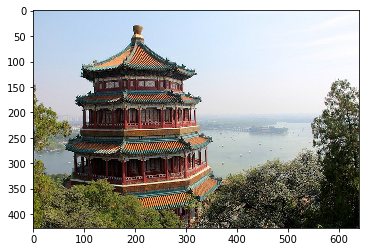

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow  
imshow(first_img_data)
# plt.imshow(image)
# plt.show()

In [115]:
img = Image.fromarray(first_img_data, 'RGB')
img.save('aa.png')

In [136]:
import pandas as pd
df = pd.DataFrame(columns=['name','blob'])
for i, np_img in enumerate(dataset.images):
    # img = Image.fromarray(np_img, 'RGB')
    # img.save(f'{i}.png')
    df = df.append({'blob': np_img, 'name': str(i)}, ignore_index=True)
df.head()


,name,blob
0,0,"[[[174, 201, 231], [174, 201, 231], [174, 201,..."
1,1,"[[[2, 19, 13], [3, 18, 13], [7, 20, 13], [8, 2..."


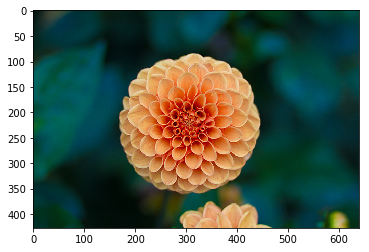

In [137]:
imshow(df.blob[1])


In [107]:
# load and show an image with Pillow
from PIL import Image
# load the image

image = Image.open('opera_house.jpg')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()

FileNotFoundError: [Errno 2] No such file or directory: 'opera_house.jpg'

In [186]:
import panel as pn
import holoviews as hv
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
pn.extension()

select_row = pn.widgets.Select(options=list(df.index), value=0, name='select row')
    
'''
@pn.depends(select_row.param.value) 
def row_display(i=select_row):
    row = df.iloc[[i]]
    return pn.Row(row)
'''

'''@pn.depends(select_row.param.value)  # , watch=True)
def show_image(r=select_row):
    # img=None
    # imshow(df.blob[r])
    # pict = hv.RGB.load_image(PIL.RGB(df.blob[r]))
    imshow(df.blob[r])
    # imshow(df.blob[i])
    # return img
    # return # pict'''
 

def show_image(r=0):
    p = figure()
    p.image_rgba(df.blob[r][:,2], 0,0,1,1)
    show(p)
    
# show_image = pn.Row(imshow(df.blob[select_row.value]))
show_image = pn.Row(show_image())


row_display = pn.Row(df.iloc[[select_row.value]])  # .compute())

def df_callback(event):
    row_display.object = df.iloc[[event.new]]
    show_image.object = df.blob[event.new]
    
select_row.param.watch(df_callback, 'value')

# table = hv.Table(df)
pn.Row(show_image, select_row, row_display)

RuntimeError: Columns need to be 1D (image is not)

In [200]:
df.blob[0][:,:,1].shape

(427, 640)

In [201]:
print(row_display(0)[0].object)

TypeError: 'Row' object is not callable

Str(AxesImage)

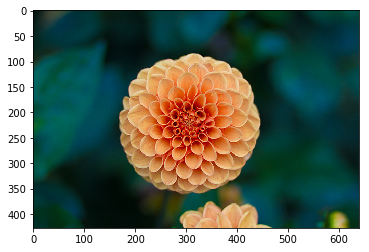

In [202]:
pn.panel(imshow(df.blob[1]))

In [ ]:
# load and show an image with Pillow
from PIL import Image
# load the image
image = Image.open('opera_house.jpg')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
image.show()